<a href="https://colab.research.google.com/github/Kashfianaz/CNN-code/blob/main/Copy_of_VGG19_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
%matplotlib inline

In [ ]:
# To download checkpoints, Keras models, TFLite models
from google.colab import files

# Life is incomplete without this statement!
import tensorflow as tf

# And this as well!
import numpy as np

import matplotlib



# To visualize results
import matplotlib.pyplot as plt

import os
import datetime

In [ ]:
! pip install keras numpy matplotlib mnist

In [ ]:
import pandas as pd

In [ ]:
matplotlib.style.use('ggplot')

In [ ]:
from keras.layers import Input, Dense,Flatten, Conv2D, MaxPooling2D
from keras.models import Model

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/client/session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense, GlobalAveragePooling2D
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
model_VGG19 = VGG19(weights="imagenet",include_top = False, input_shape=IMAGE_SIZE + [3],)

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in model_VGG19.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(model_VGG19.output)

In [ ]:
prediction = Dense(28, activation='softmax')(x)

model = Model(inputs=model_VGG19.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
!pip install keras-metrics

In [ ]:
import tensorflow as tf

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),'accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range=45,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ASL_Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 5178 images belonging to 28 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/ASL_Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 1338 images belonging to 28 classes.


In [ ]:
validation_set = validation_datagen.flow_from_directory('/content/drive/MyDrive/ASL_Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 1338 images belonging to 28 classes.


In [ ]:
# Assuming you have already defined and initialized your 'model', 'training_set', and 'test_set' variables

# Set the number of steps per epoch
STEPS_PER_EPOCH = 50

# Fit the model
history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=20,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_steps=len(test_set),
    shuffle=True,
    verbose=1
)

Epoch 1/20
50/50 [==============================] - 522s 10s/step - loss: 3.5436 - precision: 0.6250 - recall: 0.1625 - accuracy: 0.2975 - val_loss: 1.3108 - val_precision: 0.7807 - val_recall: 0.4417 - val_accuracy: 0.6442
Epoch 2/20
50/50 [==============================] - 150s 3s/step - loss: 1.5664 - precision: 0.7910 - recall: 0.4400 - accuracy: 0.5850 - val_loss: 1.0522 - val_precision: 0.8295 - val_recall: 0.6435 - val_accuracy: 0.7190
Epoch 3/20
50/50 [==============================] - 132s 3s/step - loss: 0.8705 - precision: 0.8600 - recall: 0.6525 - accuracy: 0.7550 - val_loss: 0.6186 - val_precision: 0.9023 - val_recall: 0.7451 - val_accuracy: 0.8176
Epoch 4/20
50/50 [==============================] - 119s 2s/step - loss: 0.6258 - precision: 0.9197 - recall: 0.7645 - accuracy: 0.8375 - val_loss: 0.3493 - val_precision: 0.9441 - val_recall: 0.8587 - val_accuracy: 0.8984
Epoch 5/20
50/50 [==============================] - 106s 2s/step - loss: 0.4955 - precision: 0.9213 - recal

In [ ]:
 score = model.evaluate(test_set,verbose=0)
 print('Accuracy: %2f%%'%(score[1]*100))

Accuracy: 96.606332%


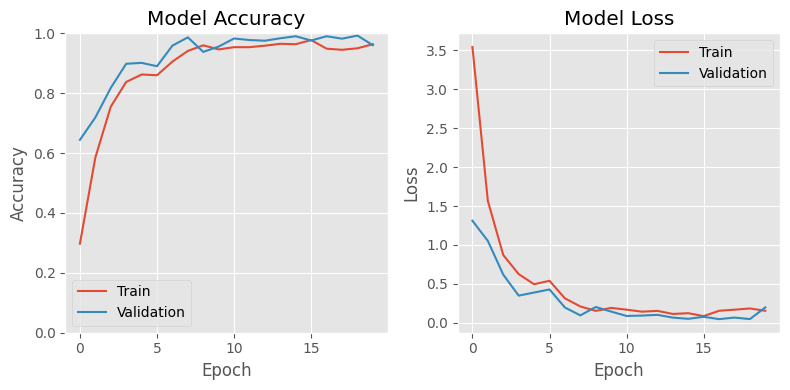

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
#plot training and validation accuracy values
axes[0].set_ylim(0,1)
axes[0].plot(history.history['accuracy'], label='Train')
axes[0].plot(history.history['val_accuracy'], label='Validation')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
#plot training and validation loss values
#axes[1].set_ylim(0,1)
axes[1].plot(history.history['loss'], label='Train')
axes[1].plot(history.history['val_loss'], label='Validation')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
plt.tight_layout()
plt.show()

In [ ]:
#predict model
y_pred = model.predict(validation_set)
y_pred =  np.argmax(y_pred,axis=1)

print(y_pred)
#Confusion Matrix
from sklearn.metrics import confusion_matrix
batch_size = 100
target_names = ['free', 'diseases']

import sklearn.metrics as metrics
print('Confusion Matrix')
cm = metrics.confusion_matrix(validation_set.classes, y_pred)
print(cm)
print('Classification Report')
print(metrics.classification_report(validation_set.classes, y_pred))

84/84 [==============================] - 12s 132ms/step
[19  9  2 ... 15 22 26]
Confusion Matrix
[[0 0 4 5 2 0 1 3 0 1 3 0 2 1 2 1 2 1 4 4 1 1 4 1 1 6 3 0]
 [4 0 1 0 3 0 3 2 4 3 1 0 1 2 2 2 0 1 0 1 3 0 1 1 0 3 2 2]
 [6 1 1 1 3 0 0 1 2 0 5 2 1 2 0 2 0 0 1 0 0 2 4 0 3 2 2 5]
 [4 4 4 1 2 0 0 1 3 2 0 2 2 1 2 1 1 3 1 1 4 0 2 3 3 4 2 5]
 [6 2 1 1 1 0 1 2 2 3 1 3 3 2 0 1 2 2 1 1 0 0 2 0 0 2 3 6]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0]
 [1 3 1 2 0 0 3 4 2 2 0 2 2 1 1 1 0 1 2 2 1 0 1 0 1 1 1 5]
 [2 1 5 3 4 0 1 3 1 1 2 1 3 0 1 0 1 2 2 0 1 0 2 1 1 3 1 2]
 [1 0 1 1 3 1 1 0 1 1 1 5 1 1 3 2 2 0 1 0 1 1 0 1 1 6 3 5]
 [2 1 2 3 0 1 3 0 1 1 0 0 2 3 0 3 0 4 2 2 0 0 3 6 2 5 2 3]
 [1 3 2 2 0 0 1 2 0 2 3 4 1 2 0 0 1 0 4 1 0 0 2 1 2 2 0 1]
 [3 1 0 2 0 0 1 2 1 2 3 1 0 0 1 2 1 2 2 2 1 0 3 1 1 4 3 3]
 [0 0 2 6 0 0 1 1 1 2 1 1 0 2 0 3 0 3 4 1 1 0 2 2 0 2 3 5]
 [3 1 1 0 1 1 0 2 3 2 0 0 3 0 0 1 0 4 2 1 2 1 2 2 4 1 1 3]
 [1 3 1 0 0 0 2 0 0 1 1 0 2 0 1 1 1 4 0 1 0 0 1 2 0 4 1 3]
 [1 0 2 2 1 0 1 1 

In [ ]:
import numpy as np
import sklearn.metrics as metrics

def sensitivity(TPR):
    return np.mean(TPR)

def specificity(TNR):
    return np.mean(TNR)

def precision(PPV):
    return np.mean(PPV)

# Assuming you have already defined 'y_true' and 'y_pred' variables
# 'y_true' contains the true class labels and 'y_pred' contains the predicted class labels

# Sample data (replace this with your actual data)
y_true = [1, 0, 1, 0, 1, 1, 0, 0, 1, 0]
y_pred = [1, 1, 1, 0, 1, 0, 0, 1, 0, 1]

# Calculate the confusion matrix
cm = metrics.confusion_matrix(y_true, y_pred)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = len(y_true) - (FP + FN + TP)

# Calculate sensitivity (True Positive Rate)
TPR = TP / (TP + FN)

# Calculate specificity (True Negative Rate)
TNR = TN / (TN + FP)

# Calculate precision (Positive Predictive Value)
PPV = TP / (TP + FP)

# Calculate false positive rate (False Alarm Rate)
FPR = FP / (FP + TN)

# Calculate false negative rate (Miss Rate)
FNR = FN / (FN + TP)

# Calculate negative predictive value
NPV = TN / (TN + FN)

# Calculate false discovery rate
FDR = FP / (FP + TP)

# Calculate F1 score
F1 = 2 * TP / (2 * TP + FP + FN)

ACC = (TP + TN) / (TP + FP + FN + TN)

# Calculate mean absolute error
MAE = metrics.mean_absolute_error(y_true, y_pred)

# Calculate root mean squared error
RMSE = np.sqrt(metrics.mean_squared_error(y_true, y_pred))

# Print the results
print("Rec=   {:.2f}".format(sensitivity(TPR) * 100))
print("Spe=   {:.2f}".format(specificity(TNR) * 100))
print("Pre=   {:.2f}".format(precision(PPV) * 100))
print("FPR=   {:.2f}".format(np.mean(FPR) * 100))
print("FNR=   {:.2f}".format(np.mean(FNR) * 100))
print("NPV=   {:.2f}".format(np.mean(NPV) * 100))
print("FDR=   {:.2f}".format(np.mean(FDR) * 100))
print("F1=    {:.2f}".format(np.mean(F1) * 100))
print("ACC=   {:.2f}".format(np.mean(ACC) * 100))
print("MAE=   {:.2f}".format(MAE * 100))
print("RMSE=  {:.2f}".format(RMSE * 100))

Rec=   50.00
Spe=   50.00
Pre=   50.00
FPR=   50.00
FNR=   50.00
NPV=   50.00
FDR=   50.00
F1=    49.49
ACC=   50.00
MAE=   50.00
RMSE=  70.71
